In [1]:
#Data generation 
import numpy as np
import torch 


true_b = 1
true_w = 2 
N = 100

# set the random seed for numpy 
np.random.seed(43)

x= np.random.rand(N,1)
epsilon = (.1 * np.random.rand(N,1))

y = true_b + true_w *x + epsilon

# Generate training and validating sets 
idx = np.arange(N)
np.random.shuffle(idx)

# Use first 80 randowm indices for train
train_idx = idx[:int(N*.8)]
val_idx = idx[int(N*.8):]

# Generate train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

# Data preparation 
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Tranform the data from numpy array to torch tensor
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

In [2]:
# We use `PytorchViz` to visualize the graph
# link of the package: https://github.com/szagoruyko/pytorchviz 
# installation 
# $brew install graphviz
# of $pip install torchviz 

In [3]:
import torch 

device = 'cuda' if torch.cuda.is_available() else 'cpu'
# Step 0 - Initialize parameter 'b' and 'w'

# Set the random seed 
torch.manual_seed(42)


b = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)

w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)

# Step 1 - Computes our model's predicted output- forward pass
yhat = b + w * x_train_tensor 

# Step 2 - Computes the loss
error = (yhat - y_train_tensor)
loss = (error ** 2).mean()




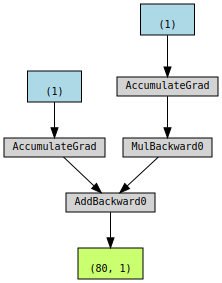

In [4]:
from torchviz import make_dot
make_dot(yhat)

In [5]:
# Plotting without gradients 

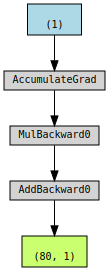

In [6]:
b_nograd = torch.randn(1, requires_grad=False, \
                      dtype=torch.float, device=device)
w =torch.randn(1, requires_grad=True, \
                  dtype=torch.float, device=device)

yhat = b_nograd + w*x_train_tensor

make_dot(yhat)